In [1]:
import theseus_growth as th
th = th.theseus()

In [2]:
x_data = [ 1, 3, 7, 14, 30, 60, 90, 180 ]
y_data = [ 80, 70, 55, 50, 30, 22, 10, 8 ]

facebook = th.create_profile( days = x_data, retention_values = y_data )

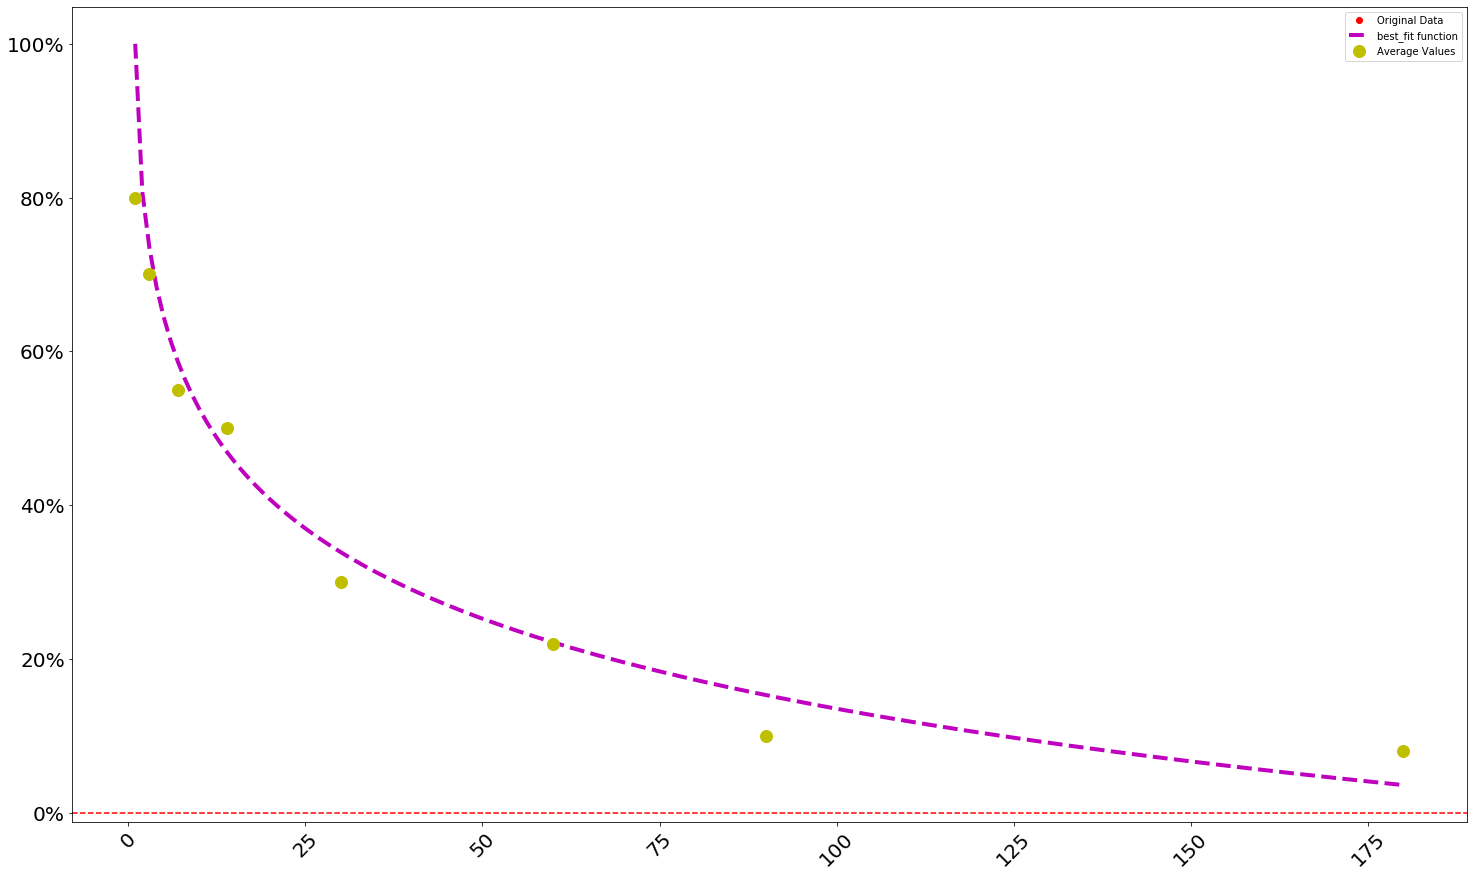

In [3]:
th.plot_retention( facebook )

In [4]:
#cohorts are daily new user values, eg. the number of new users
#joining the product on a given day
cohorts = [1000, 1000, 1000, 1000, 1000 ]

facebook_DAU = th.project_cohorted_DAU( profile = facebook, periods = 50, 
    cohorts = cohorts, start_date = 1 )

print( facebook_DAU )

                1     2     3     4     5    6    7    8    9   10  ...   41  \
cohort_date                                                         ...        
1            1000   807   734   684   645  613  587  564  543  525  ...  285   
2               0  1000   807   734   684  645  613  587  564  543  ...  290   
3               0     0  1000   807   734  684  645  613  587  564  ...  294   
4               0     0     0  1000   807  734  684  645  613  587  ...  298   
5               0     0     0     0  1000  807  734  684  645  613  ...  303   

              42   43   44   45   46   47   48   49   50  
cohort_date                                               
1            281  277  273  270  266  262  259  255  252  
2            285  281  277  273  270  266  262  259  255  
3            290  285  281  277  273  270  266  262  259  
4            294  290  285  281  277  273  270  266  262  
5            298  294  290  285  281  277  273  270  266  

[5 rows x 50 columns]


In [5]:
facebook_total = th.DAU_total( facebook_DAU )

print( facebook_total )

        1     2     3     4     5     6     7     8     9    10  ...    41  \
DAU                                                              ...         
0    1000  1807  2541  3225  3870  3483  3263  3093  2952  2832  ...  1470   

       42    43    44    45    46    47    48    49    50  
DAU                                                        
0    1448  1427  1406  1386  1367  1348  1330  1312  1294  

[1 rows x 50 columns]


In [6]:
facebook_DAU = th.project_cohorted_DAU( profile = facebook, periods = 50, cohorts = cohorts, 
    DAU_target = 10000, DAU_target_timeline = 10, start_date = 1 )

print( facebook_DAU )

                1     2     3     4     5     6     7     8     9    10  ...  \
cohort_date                                                              ...   
1            1000   807   734   684   645   613   587   564   543   525  ...   
2               0  1000   807   734   684   645   613   587   564   543  ...   
3               0     0  1000   807   734   684   645   613   587   564  ...   
4               0     0     0  1000   807   734   684   645   613   587  ...   
5               0     0     0     0  1000   807   734   684   645   613  ...   
6               0     0     0     0     0  1613  1302  1184  1103  1040  ...   
7               0     0     0     0     0     0  1757  1418  1290  1201  ...   
8               0     0     0     0     0     0     0  1853  1495  1361  ...   
9               0     0     0     0     0     0     0     0  1934  1561  ...   
10              0     0     0     0     0     0     0     0     0  2005  ...   

              41   42   43   44   45   

In [7]:
#get DNU from a DAU projection
DNU = [ facebook_DAU.iloc[ x, x ] for x in range( 0, min( facebook_DAU.shape ) ) ]
print( "All DNU: " + str( DNU ) )
print( "Additional DNU: " + str( DNU[ len( cohorts ): ] ) )

All DNU: [1000, 1000, 1000, 1000, 1000, 1613, 1757, 1853, 1934, 2005]
Additional DNU: [1613, 1757, 1853, 1934, 2005]


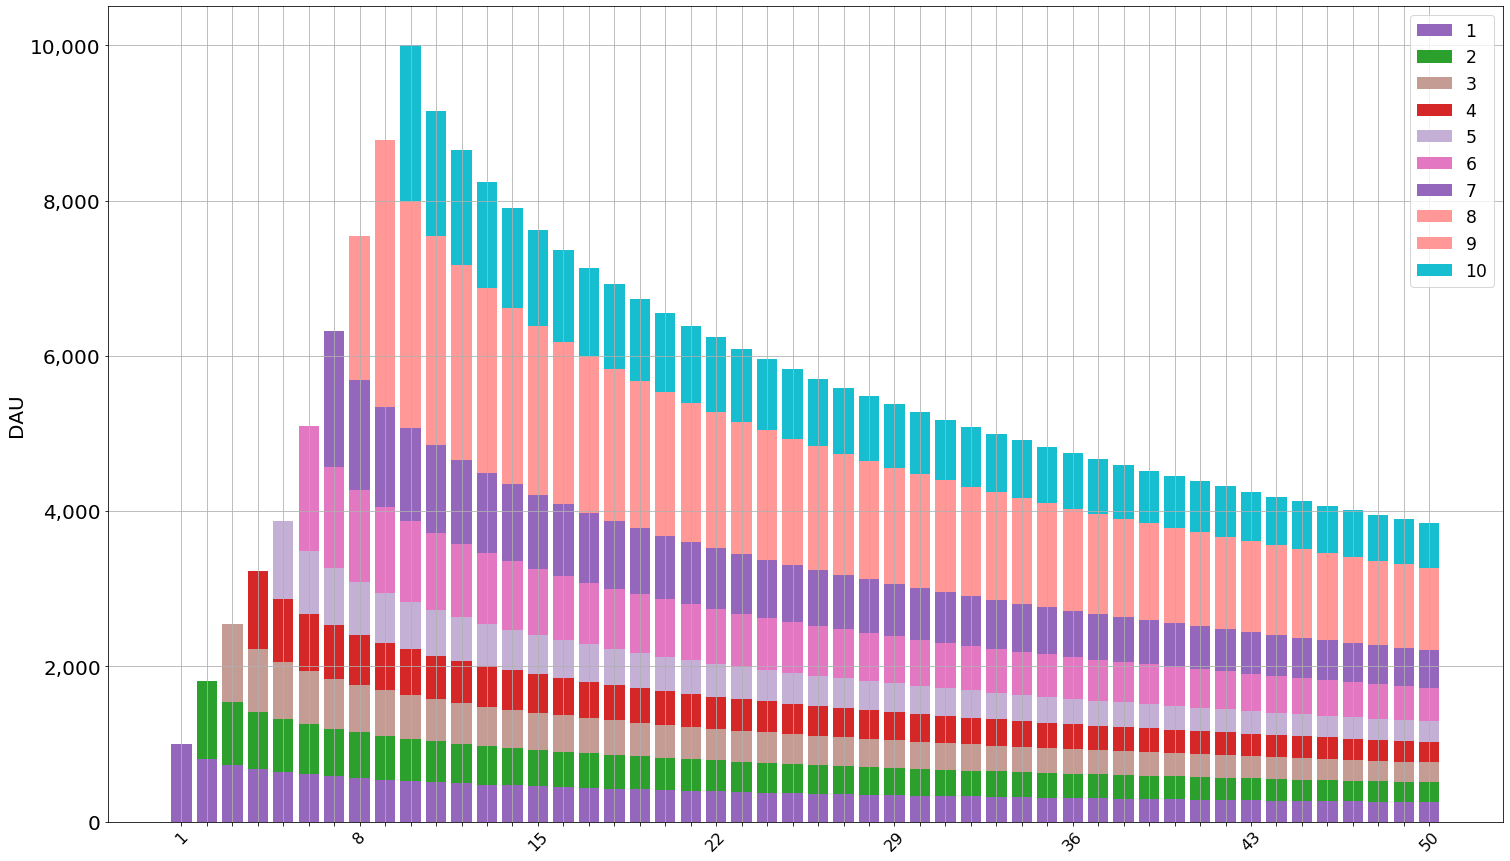

In [8]:
th.plot_forward_DAU_stacked( forward_DAU = facebook_DAU, 
    forward_DAU_labels = list( facebook_DAU.index ), 
    forward_DAU_dates = list( facebook_DAU.columns ), 
)

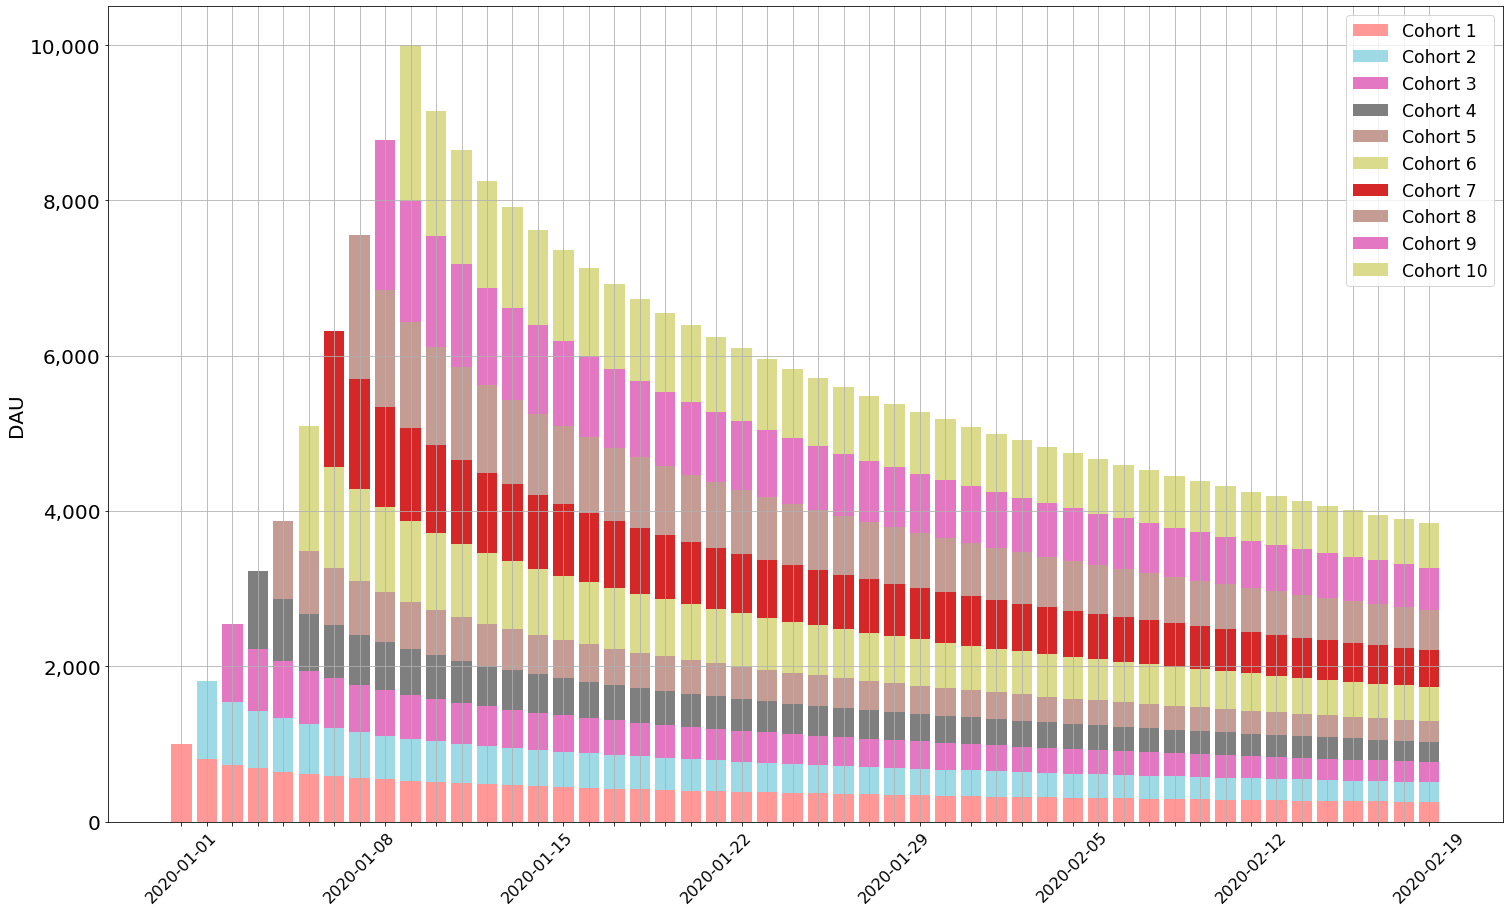

In [9]:
from datetime import date, timedelta
th.plot_forward_DAU_stacked( forward_DAU = facebook_DAU, 
    forward_DAU_labels = [ 'Cohort ' + str( x ) for x in list( facebook_DAU.index ) ], 
    forward_DAU_dates = [ date(2020, 1, 1) + timedelta(days=int( x ) - 1 ) for x in list( facebook_DAU.columns ) ]
)

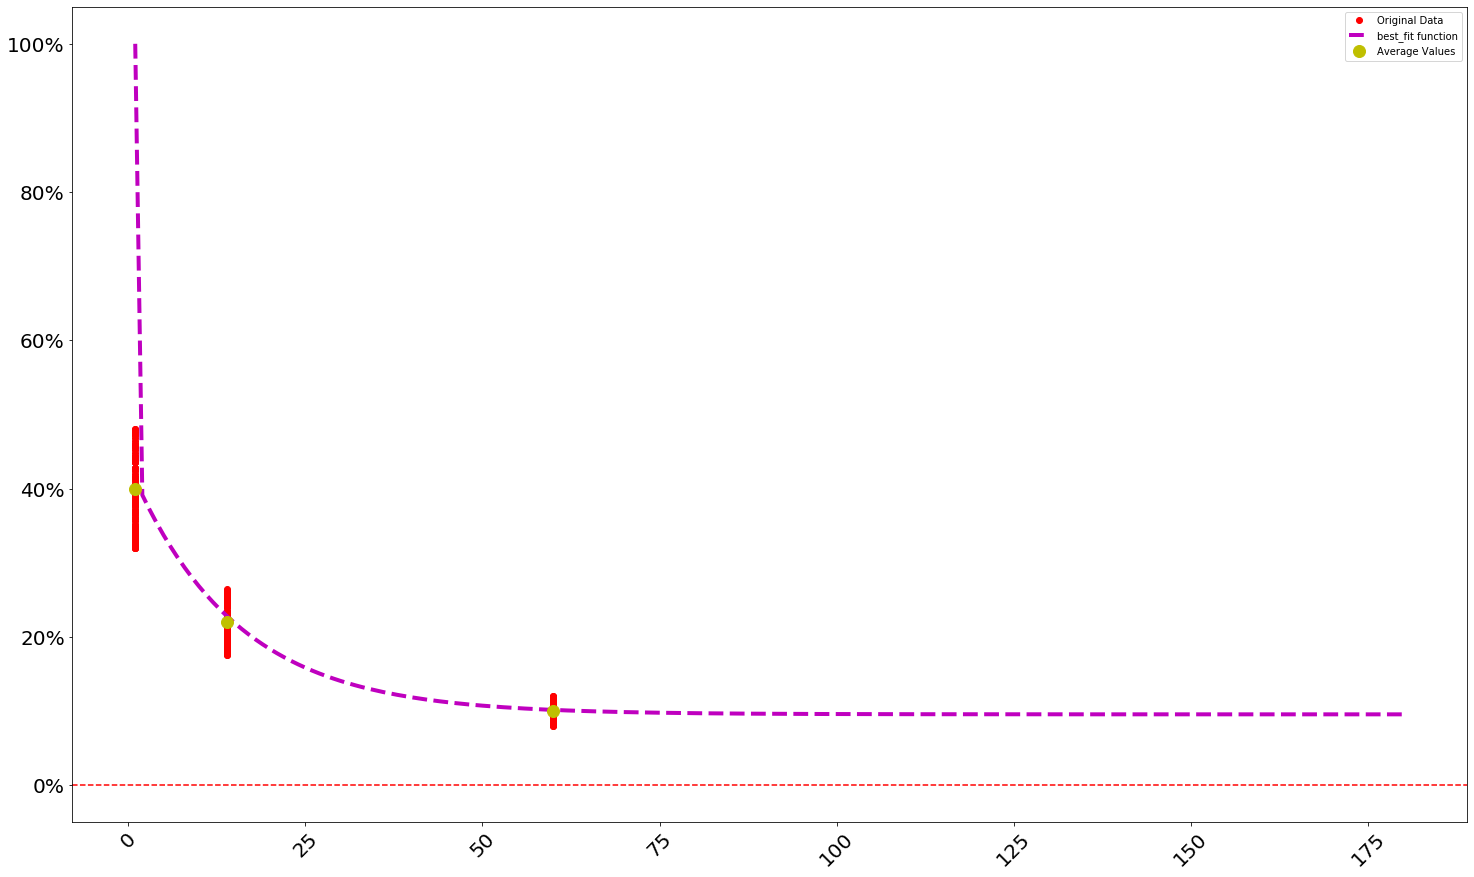

In [14]:
import numpy as np
import random

x_data = [ 1, 14, 60 ]
y_data = [ 40, 22, 10 ]

new_x = []
for i, x in enumerate( x_data ):
    this_x = x
    for z in np.arange( 1, 100 ):
        this_y = float( y_data[ i ] * ( 1 + ( random.randint( -20, 20 ) / 100 ) ) )
        y_data.append( this_y )
        new_x.append( this_x )
        
x_data.extend( new_x )

google = th.create_profile( days = x_data, retention_values = y_data, profile_max = 180 )

th.plot_retention( google )

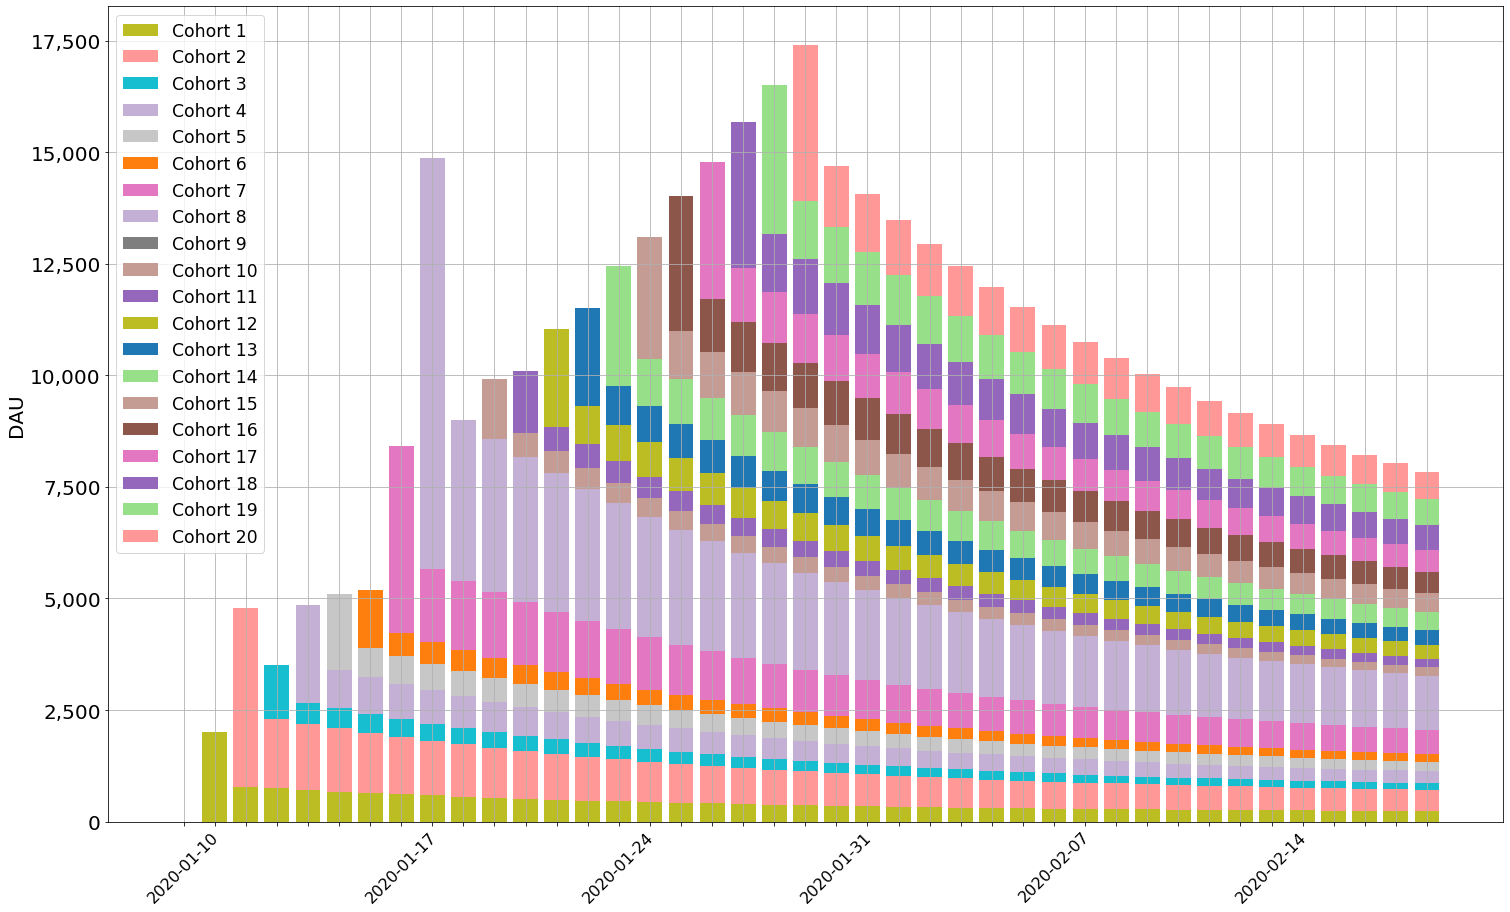

In [17]:
cohorts = [ 2000, 4000, 1200, 2200, 1700, 1300, 4200, 9200 ]
google_DAU = th.project_cohorted_DAU( profile = google, periods = 40, cohorts = cohorts, 
    DAU_target = 20000, DAU_target_timeline = 20, start_date = 10 )

from datetime import date, timedelta
th.plot_forward_DAU_stacked( forward_DAU = google_DAU, 
    forward_DAU_labels = [ 'Cohort ' + str( x ) for x in list( google_DAU.index ) ], 
    forward_DAU_dates = [ date(2020, 1, 1) + timedelta(days=int( x ) - 1 ) for x in list( google_DAU.columns ) ]
)

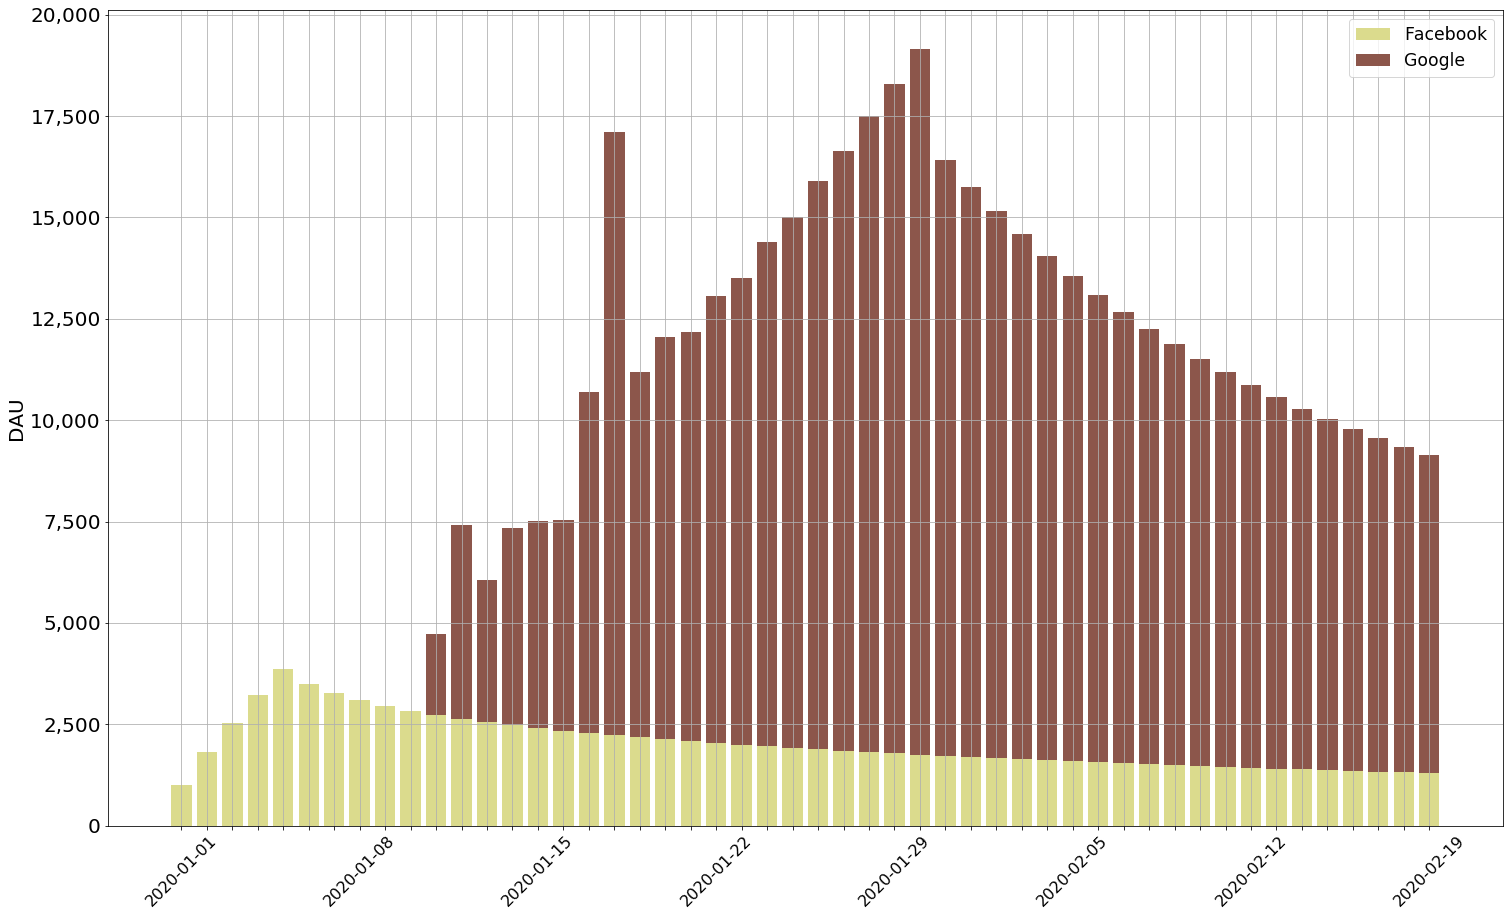

In [18]:
google_total = th.DAU_total( google_DAU )

combined_DAU = th.combine_DAU( DAU_totals = [ facebook_total, google_total ], labels = [ "Facebook", "Google" ] )

th.plot_forward_DAU_stacked( forward_DAU = combined_DAU, 
    forward_DAU_labels = list( combined_DAU.index ), 
    forward_DAU_dates = [ date(2020, 1, 1) + timedelta(days=int( x ) - 1 ) for x in list( combined_DAU.columns ) ]
)

In [19]:
x_data = [ 1, 14, 30, 90 ]
y_data = [ 25, 18, 12, 8 ]

#form options: 'log', 'exp', 'linear', 'quad', 'weibull', 'power'
snapchat = th.create_profile( days = x_data, retention_values = y_data, profile_max = 120 )

snapchat_aged_DAU = th.project_aged_DAU( snapchat, 20, [ 100, 200, 300, 400, 500 ], 
    start_date = 1, ages = [ 3, 7, 14 ] )

print( snapchat_aged_DAU )

     1  2   3   4    5    6    7    8    9   10   11   12   13   14   15   16  \
age                                                                             
3    0  0  24  71  143  236  352  343  336  327  320  312  305  296  290  282   
7    0  0   0   0    0    0   22   65  130  214  320  312  305  296  290  282   
14   0  0   0   0    0    0    0    0    0    0    0    0    0   18   55  108   

      17   18   19   20  
age                      
3    275  268  260  254  
7    275  268  260  254  
14   180  268  260  254  


In [20]:
snapchat_exact_aged_DAU = th.project_exact_aged_DAU( snapchat, 20, [ 100, 200, 300, 400, 500 ], 
    start_date = 1, ages = [ 3, 7, 14 ] )

print( snapchat_exact_aged_DAU )

     1  2   3   4   5   6    7   8   9  10   11 12 13  14  15  16  17  18 19  \
age                                                                            
3    0  0  24  48  73  97  121   0   0   0    0  0  0   0   0   0   0   0  0   
7    0  0   0   0   0   0   22  44  66  88  110  0  0   0   0   0   0   0  0   
14   0  0   0   0   0   0    0   0   0   0    0  0  0  18  37  55  74  93  0   

    20  
age     
3    0  
7    0  
14   0  


In [21]:
snapchat_exact_aged_DAU = th.project_exact_aged_DAU( snapchat, 20, [ 100, 200, 300, 400, 500 ], 
    start_date = 1, ages = [ 1 ] )

print( snapchat_exact_aged_DAU )

       1    2    3    4    5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
age                                                                      
1    100  200  300  400  500  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0


In [22]:
snapchat_DAU = th.project_cohorted_DAU( profile = snapchat, periods = 20, cohorts = [ 100, 200, 300, 400, 500 ], 
    start_date = 1 )

snapchat_total = th.DAU_total( snapchat_DAU )

combined_DAU = th.combine_DAU( DAU_totals = [ snapchat_aged_DAU, snapchat_total ], 
    labels = [ [ "Age " + str( x ) for x in list( snapchat_aged_DAU.index ) ], "Total" ] 
)

for x in list( snapchat_aged_DAU.index ):
    combined_DAU.loc[ 'Age ' + str( x ) + ' Pct' ] = combined_DAU.apply( lambda z: ( z[ 'Age ' + str( x )] / z[ 'Total' ] ) )

print( combined_DAU )

                1      2           3           4           5           6  \
profile                                                                    
Age 3         0.0    0.0   24.000000   71.000000  143.000000  236.000000   
Age 7         0.0    0.0    0.000000    0.000000    0.000000    0.000000   
Age 14        0.0    0.0    0.000000    0.000000    0.000000    0.000000   
Total       100.0  224.0  373.000000  545.000000  742.000000  360.000000   
Age 3 Pct     0.0    0.0    0.064343    0.130275    0.192722    0.655556   
Age 7 Pct     0.0    0.0    0.000000    0.000000    0.000000    0.000000   
Age 14 Pct    0.0    0.0    0.000000    0.000000    0.000000    0.000000   

                   7           8           9          10     11     12     13  \
profile                                                                         
Age 3       352.0000  343.000000  336.000000  327.000000  320.0  312.0  305.0   
Age 7        22.0000   65.000000  130.000000  214.000000  320.0  312.0  